In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

This dataset is designed for research and analysis of load balancing in distributed systems. It includes key features such as task size, CPU and memory demand, network latency, I/O operations, disk usage, number of connections, and priority level, along with a target variable for classification or optimization. Timestamp data is also provided for temporal analysis. It is suitable for machine learning, simulation studies, and performance optimization research. <br>

**Columns:** <br>
**task_size:** Size of the task (numeric). <br>
**cpu_demand:** CPU demand of the task (numeric). <br>
**memory_demand:** Memory demand of the task (numeric). <br>
**network_latency:** Network latency associated with the task (numeric). <br>
**io_operations:** Number of I/O operations (numeric). <br>
**disk_usage:** Disk usage for the task (numeric). <br>
**num_connections:** Number of active connections for the task (numeric). <br>
**priority_level:** Priority level assigned to the task (numeric). <br>
**target:**Target label indicating the outcome or category (binary). <br>
**timestamp:** Timestamp when the task data was recorded. <br>

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [5]:
# Importing all datasets
LoadBalancerSystem = pd.read_csv("./../dataset2.csv")
LoadBalancerSystem.head(4)

,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target,timestamp
0,-0.152124,3.750160,-0.981182,0.251507,-0.471993,1.007026,0.313790,3.050953,1,2023-03-16 03:46:22
1,0.724624,-3.978920,2.022732,1.194530,-0.010304,-2.493867,-0.073875,-1.271258,0,2023-09-02 20:15:54
2,4.650228,1.145925,2.641659,-1.899635,1.187132,4.283652,0.572666,1.243801,1,2022-02-19 08:48:52
3,-0.138208,-0.189687,-0.820848,-3.060794,-1.982086,3.620598,-0.876702,0.776770,1,2023-12-22 11:58:26


In [6]:
print(LoadBalancerSystem.shape)

(2000, 10)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(LoadBalancerSystem, test_size=0.2, random_state=1)

In [9]:
print(train.shape, test.shape)

(1600, 10) (400, 10)


In [10]:
print("******************************************")
print("The columns in train data :", train.columns)
print("******************************************")
print("The columns in test data :", test.columns)
print("******************************************")

******************************************
The columns in train data : Index(['task_size', 'cpu_demand', 'memory_demand', 'network_latency',
       'io_operations', 'disk_usage', 'num_connections', 'priority_level',
       'target', 'timestamp'],
      dtype='object')
******************************************
The columns in test data : Index(['task_size', 'cpu_demand', 'memory_demand', 'network_latency',
       'io_operations', 'disk_usage', 'num_connections', 'priority_level',
       'target', 'timestamp'],
      dtype='object')
******************************************


In [11]:
train.to_csv("train_load_balancer.csv")

In [12]:
test.to_csv("test_load_balancer.csv")

In [13]:
# Importing all datasets
train_dataset = pd.read_csv("./train_load_balancer.csv")
train_dataset.head(4)

,Unnamed: 0,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target,timestamp
0,0,-0.152124,3.750160,-0.981182,0.251507,-0.471993,1.007026,0.313790,3.050953,1,2023-03-16 03:46:22
1,816,1.930613,0.201507,0.900053,-2.852267,-0.378427,6.186046,0.004378,-2.640569,1,2023-07-11 11:25:06
2,790,-0.223035,1.079908,1.188093,-0.567074,-2.096112,3.900941,1.822198,-0.215694,1,2024-05-29 18:16:47
3,361,-2.244830,1.147788,-0.800131,-0.368518,-1.758088,-0.251707,-0.397672,2.721916,0,2022-10-24 20:29:08


In [14]:
# Importing all datasets
test_dataset = pd.read_csv("./test_load_balancer.csv")
test_dataset.head(4)

,Unnamed: 0,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target,timestamp
0,674,-0.663157,1.738541,0.286945,1.500713,-1.440126,0.882116,-1.020568,0.547481,1,2023-08-23 06:23:33
1,1699,0.000000,0.308381,2.508549,58.000000,9.000000,4.425892,14.000000,1.000000,1,2025-04-17 03:09:56.537887
2,1282,2.178165,1.259174,2.246238,129.000000,7.000000,0.956963,8.000000,0.000000,0,2025-04-15 11:26:56.535884
3,1315,0.000000,0.000000,0.743231,66.000000,13.000000,4.419766,6.000000,0.000000,0,2025-04-14 19:13:56.535884


In [15]:
###! pip install klib

In [16]:
import klib

In [17]:
klib.corr_mat(train_dataset)

,Unnamed: 0,task_size,cpu_demand,memory_demand,network_latency,io_operations,disk_usage,num_connections,priority_level,target
Unnamed: 0,1.00,0.32,0.21,0.22,0.69,0.75,0.16,0.67,-0.10,0.02
task_size,0.32,1.00,0.39,0.41,0.27,0.31,0.55,0.29,0.01,0.22
cpu_demand,0.21,0.39,1.00,0.11,0.20,0.15,0.42,0.19,0.26,0.39
memory_demand,0.22,0.41,0.11,1.00,0.21,0.19,0.23,0.19,0.26,0.07
network_latency,0.69,0.27,0.20,0.21,1.00,0.66,0.13,0.62,-0.08,0.01
io_operations,0.75,0.31,0.15,0.19,0.66,1.00,0.08,0.67,-0.16,0.02
disk_usage,0.16,0.55,0.42,0.23,0.13,0.08,1.00,0.14,-0.14,0.17
num_connections,0.67,0.29,0.19,0.19,0.62,0.67,0.14,1.00,-0.08,0.02
priority_level,-0.10,0.01,0.26,0.26,-0.08,-0.16,-0.14,-0.08,1.00,0.23
target,0.02,0.22,0.39,0.07,0.01,0.02,0.17,0.02,0.23,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

<Figure size 1500x800 with 0 Axes>

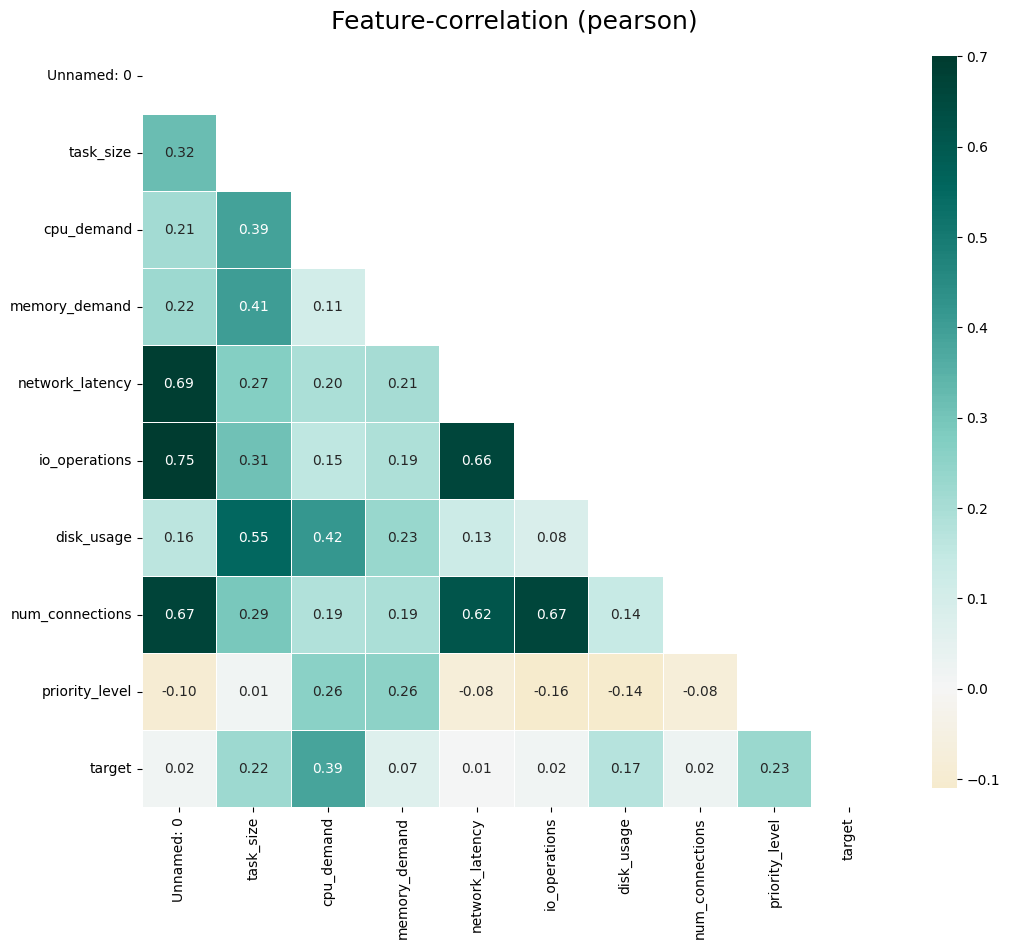

In [18]:
plt.figure(figsize=[15,8])
klib.corr_plot(train_dataset)

In [19]:
klib.missingval_plot(train_dataset)

No missing values found in the dataset.


In [20]:
train_dataset = klib.data_cleaning(train_dataset)
test_dataset = klib.data_cleaning(test_dataset)

Shape of cleaned data: (1600, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.06 MB (-46.15%)

Shape of cleaned data: (400, 11) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-33.33%)



In [21]:
train_cleaned = klib.clean_column_names(train_dataset)
test_cleaned = klib.clean_column_names(test_dataset)

In [22]:
print(train_cleaned.shape, test_cleaned.shape)

(1600, 11) (400, 11)


In [23]:
train_cleaned = klib.convert_datatypes(train_cleaned)
test_cleaned = klib.convert_datatypes(test_cleaned)

<Axes: xlabel='priority_level', ylabel='Density'>

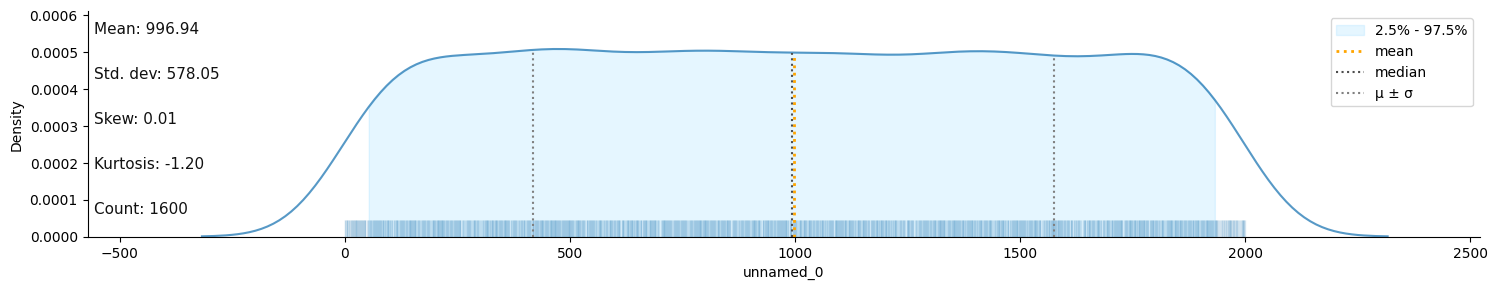

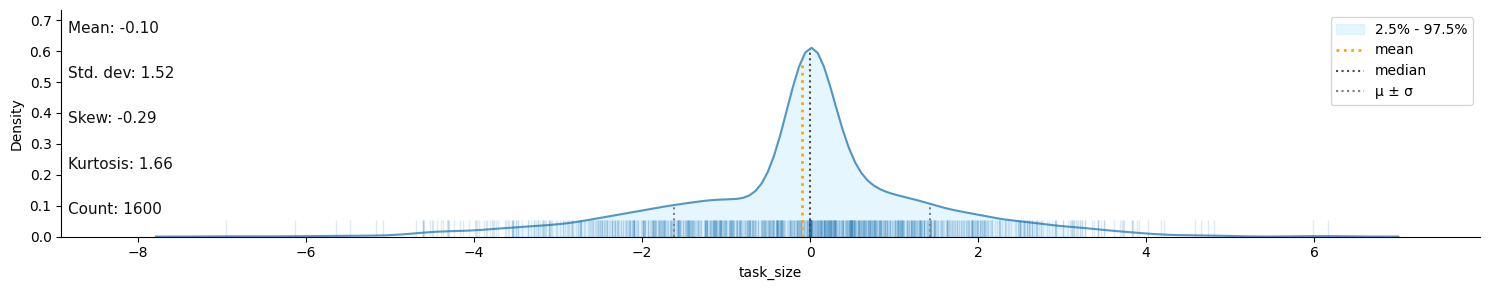

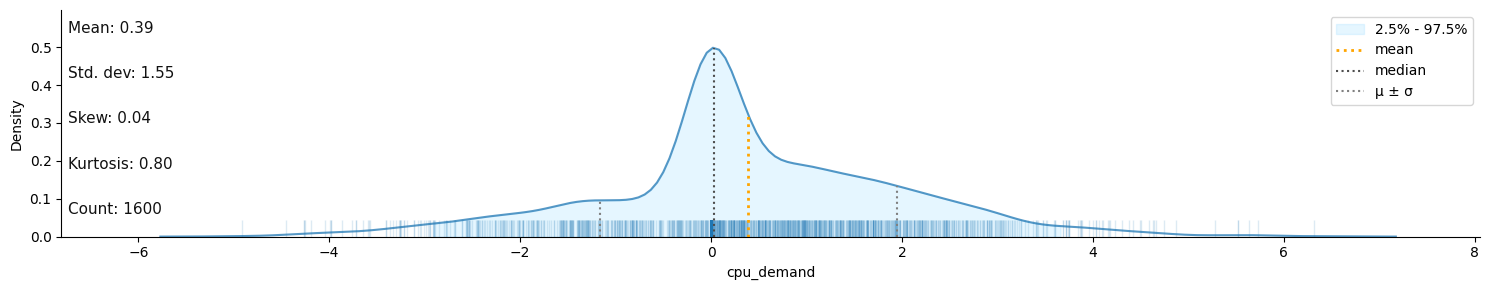

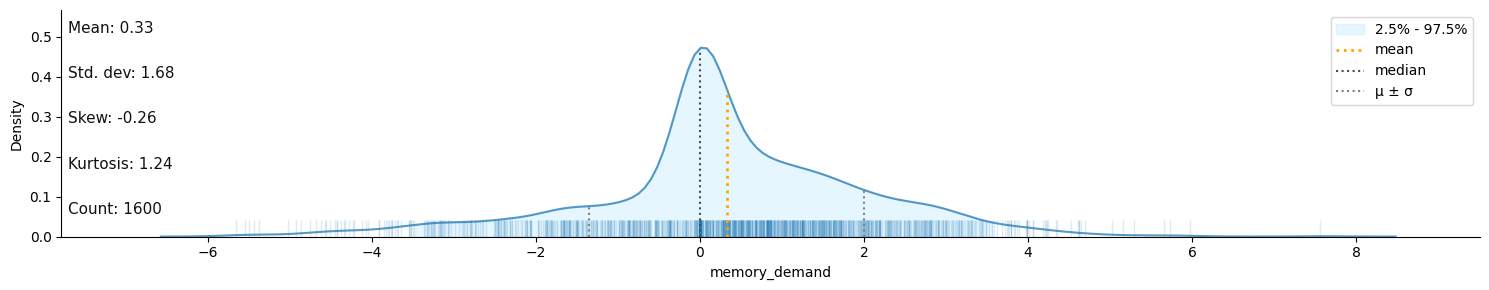

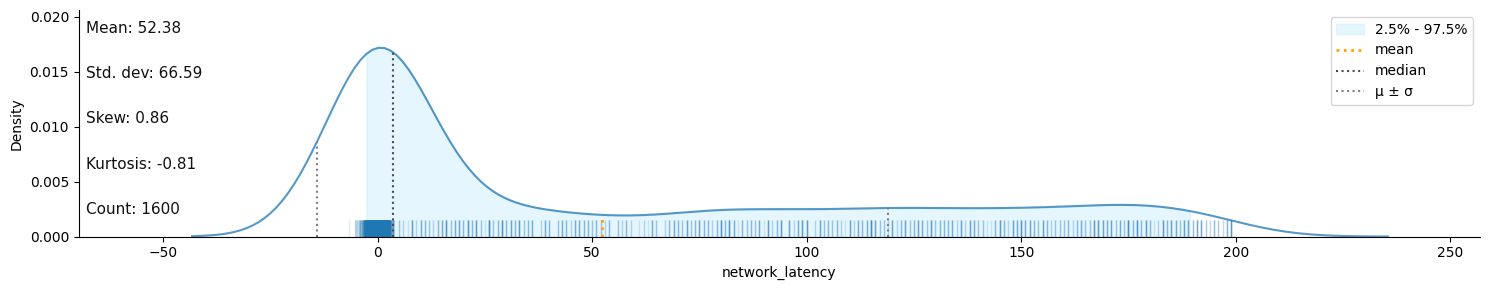

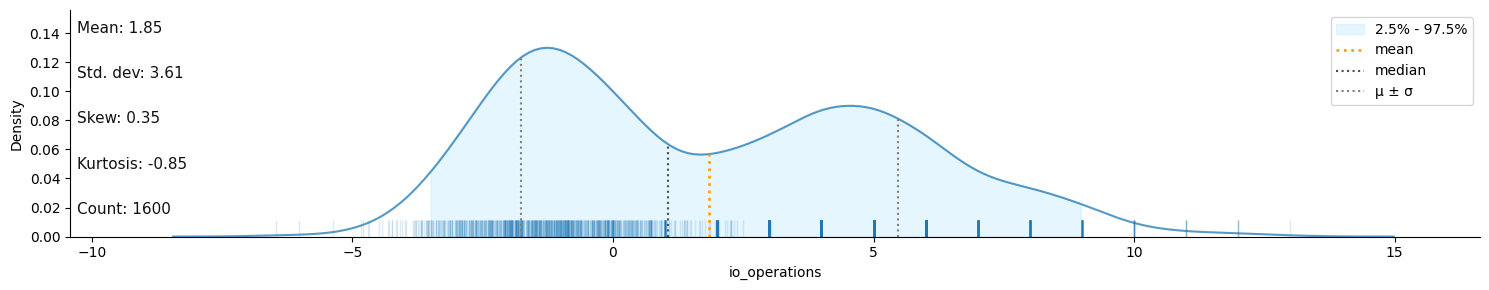

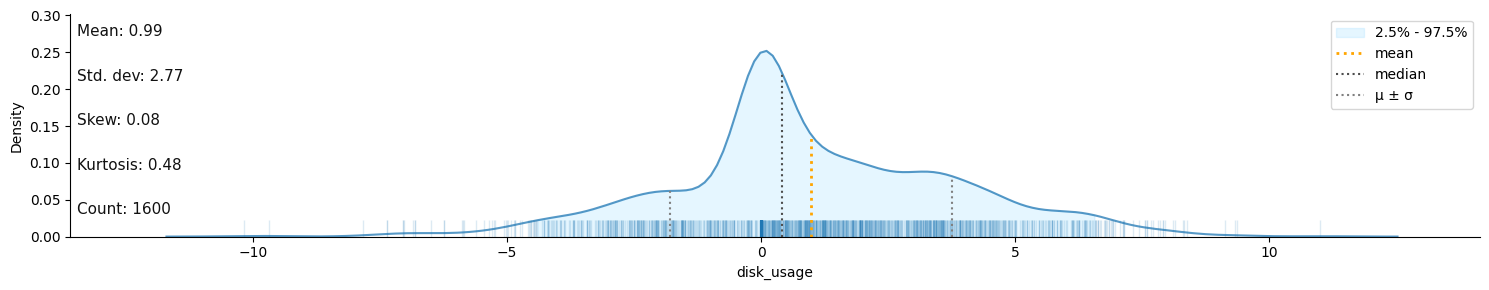

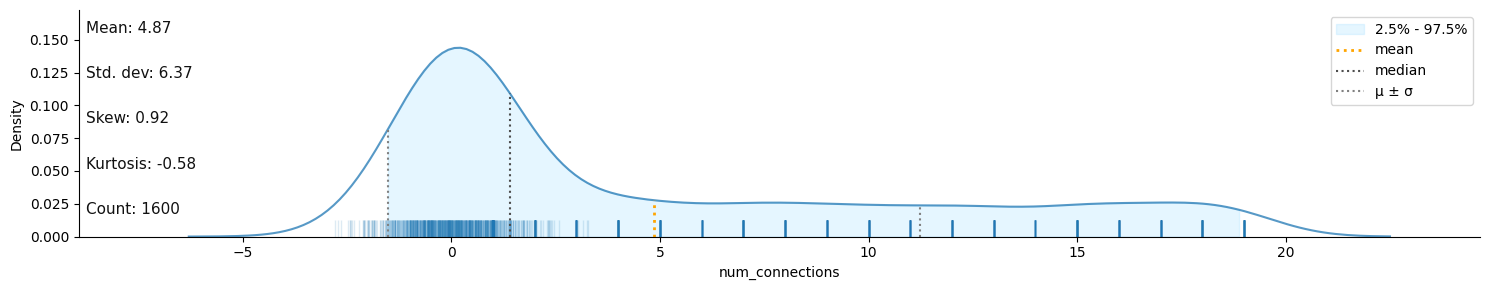

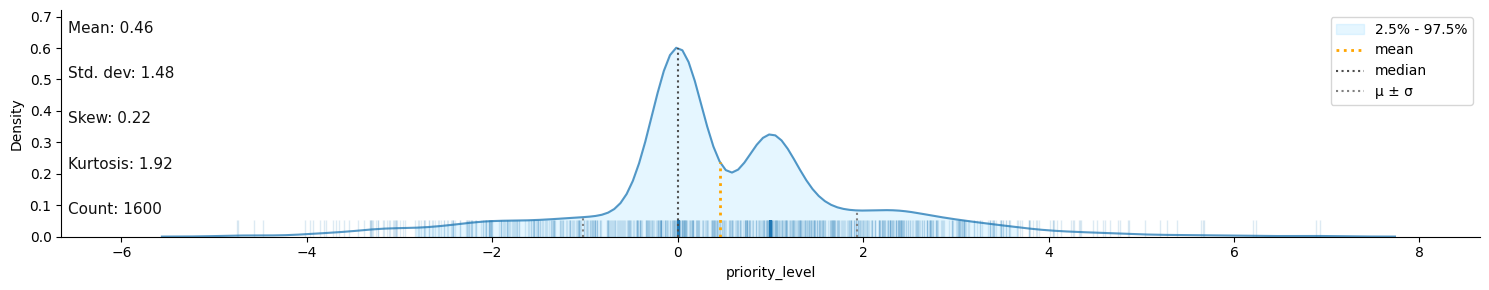

In [24]:
klib.dist_plot(train_cleaned)

In [25]:
train_cleaned.dtypes

unnamed_0            int16
task_size          float32
cpu_demand         float32
memory_demand      float32
network_latency    float32
io_operations      float32
disk_usage         float32
num_connections    float32
priority_level     float32
target                int8
timestamp           string
dtype: object

In [26]:
#train_cleaned["timestamp"] = pd.to_datetime(train_cleaned["timestamp"], format="mixed", errors="coerce")

In [27]:
def parse_dates(date_str):
    for fmt in ("%Y-%m-%d", "%d/%m/%Y", "%m-%d-%Y", "%Y/%m/%d %H:%M:%S"):  # Add formats as needed
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue
    return pd.NaT

train_cleaned["timestamp"] = train_cleaned["timestamp"].apply(parse_dates)


In [28]:
#test_cleaned["timestamp"] = pd.to_datetime(test_cleaned["timestamp"], format="mixed", errors="coerce")

In [29]:
def parse_dates(date_str):
    for fmt in ("%Y-%m-%d", "%d/%m/%Y", "%m-%d-%Y", "%Y/%m/%d %H:%M:%S"):  # Add formats as needed
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue
    return pd.NaT

test_cleaned["timestamp"] = test_cleaned["timestamp"].apply(parse_dates)


In [30]:
train_cleaned["day"] = train_cleaned["timestamp"].dt.day
train_cleaned["month"] = train_cleaned["timestamp"].dt.month
train_cleaned["year"] = train_cleaned["timestamp"].dt.year
train_cleaned["hour"] = train_cleaned["timestamp"].dt.hour

In [31]:
train_cleaned.drop(columns="timestamp", inplace=True)
train_cleaned.drop(columns="unnamed_0", inplace=True)

In [32]:
test_cleaned["day"] = test_cleaned["timestamp"].dt.day
test_cleaned["month"] = test_cleaned["timestamp"].dt.month
test_cleaned["year"] = test_cleaned["timestamp"].dt.year
test_cleaned["hour"] = test_cleaned["timestamp"].dt.hour

In [33]:
test_cleaned.drop(columns="timestamp", inplace=True)
test_cleaned.drop(columns="unnamed_0", inplace=True)

In [34]:
print(train_cleaned.shape, test_cleaned.shape)

(1600, 13) (400, 13)


In [35]:
X_train = train_cleaned.drop(columns="target")
Y_train = train_cleaned["target"]

In [36]:
feature_names = X_train.columns

In [37]:
X_test = test_cleaned.drop(columns="target")
Y_test = test_cleaned["target"]

In [38]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1600, 12) (1600,) (400, 12) (400,)


In [39]:
X_train.isna().sum()

task_size          0
cpu_demand         0
memory_demand      0
network_latency    0
io_operations      0
disk_usage         0
num_connections    0
priority_level     0
day                0
month              0
year               0
hour               0
dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
###! pip install optuna

In [43]:
import optuna
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [45]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_scaled, Y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

Logistic Regression: Mean Accuracy = 0.6544, Std = 0.0206
Decision Tree: Mean Accuracy = 0.6806, Std = 0.0160
Random Forest: Mean Accuracy = 0.6919, Std = 0.0238
SVM: Mean Accuracy = 0.6912, Std = 0.0214
k-NN: Mean Accuracy = 0.6800, Std = 0.0221
Naive Bayes: Mean Accuracy = 0.6425, Std = 0.0285
Gradient Boosting: Mean Accuracy = 0.7063, Std = 0.0176
XGBoost: Mean Accuracy = 0.7050, Std = 0.0090


In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
import joblib
import logging

In [47]:
import xgboost as xgb

In [48]:
def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    }

    if param['booster'] in ['gbtree', 'dart']:
        param['n_estimators'] = trial.suggest_int('n_estimators', 50, 1000)
        param['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 10)
        param['subsample'] = trial.suggest_loguniform('subsample', 0.5, 1.0)
        param['colsample_bytree'] = trial.suggest_loguniform('colsample_bytree', 0.5, 1.0)

    if param['booster'] == 'dart':
        param['sample_type'] = trial.suggest_categorical('sample_type', ['uniform', 'weighted'])
        param['normalize_type'] = trial.suggest_categorical('normalize_type', ['tree', 'forest'])
        param['rate_drop'] = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
        param['skip_drop'] = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)

    # Train the model
    dtrain = xgb.DMatrix(X_train_scaled, label=Y_train)
    dtest = xgb.DMatrix(X_test_scaled, label=Y_test)
    bst = xgb.train(param, dtrain, evals=[(dtest, 'eval')], verbose_eval=False)

    # Make predictions
    preds = bst.predict(dtest)
    pred_labels = [1 if pred > 0.5 else 0 for pred in preds]

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, pred_labels)
    return accuracy


In [49]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=120)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-04-21 10:11:02,941] A new study created in memory with name: no-name-fbef42fe-892d-4c54-996e-8e0f5b374034
[I 2025-04-21 10:11:02,969] Trial 0 finished with value: 0.635 and parameters: {'booster': 'gbtree', 'lambda': 0.15689037617656718, 'alpha': 9.334487148969552e-07, 'max_depth': 10, 'eta': 0.5945112687021181, 'gamma': 0.0007399077691353979, 'grow_policy': 'lossguide', 'n_estimators': 172, 'min_child_weight': 10, 'subsample': 0.5012893858594961, 'colsample_bytree': 0.5335523665273092}. Best is trial 0 with value: 0.635.
[I 2025-04-21 10:11:02,991] Trial 1 finished with value: 0.5075 and parameters: {'booster': 'gbtree', 'lambda': 7.061301197052352e-06, 'alpha': 2.5559789864792394e-05, 'max_depth': 3, 'eta': 6.645414610467008e-07, 'gamma': 5.354107591212497e-06, 'grow_policy': 'lossguide', 'n_estimators': 665, 'min_child_weight': 1, 'subsample': 0.9500228385787789, 'colsample_bytree': 0.7350351305598362}. Best is trial 0 with value: 0.635.
[I 2025-04-21 10:11:03,005] Trial 2 f

Number of finished trials:  120
Best trial:
  Value:  0.71
  Params: 
    booster: gbtree
    lambda: 9.177137545111704e-05
    alpha: 0.41559046127148275
    max_depth: 9
    eta: 0.01034918239083858
    gamma: 2.049015478575505e-08
    grow_policy: lossguide
    n_estimators: 674
    min_child_weight: 3
    subsample: 0.8621543741964409
    colsample_bytree: 0.799303379380341


In [50]:
# Extract the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

Best parameters: {'booster': 'gbtree', 'lambda': 9.177137545111704e-05, 'alpha': 0.41559046127148275, 'max_depth': 9, 'eta': 0.01034918239083858, 'gamma': 2.049015478575505e-08, 'grow_policy': 'lossguide', 'n_estimators': 674, 'min_child_weight': 3, 'subsample': 0.8621543741964409, 'colsample_bytree': 0.799303379380341}


In [51]:
best_model = XGBClassifier(**study.best_params, random_state=42)

In [52]:
best_model.fit(X_train_scaled, Y_train)

XGBClassifier(alpha=0.41559046127148275, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.799303379380341, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.01034918239083858, eval_metric=None, feature_types=None,
              gamma=2.049015478575505e-08, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=9.177137545111704e-05, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=674, ...)

In [53]:
Y_pred = best_model.predict(X_test_scaled)

In [54]:
Y_pred = pd.DataFrame(Y_pred, columns=["target"])

In [55]:
print(Y_pred.value_counts())

target
0         202
1         198
dtype: int64


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [57]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       203
           1       0.69      0.69      0.69       197

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



In [58]:
# Save the model using joblib
joblib.dump(best_model, 'best_xgb_model.joblib')
print("Model saved as best_xgb_model.joblib")

Model saved as best_xgb_model.joblib


In [59]:
import pickle

In [60]:
# Save the model using pickle
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Model saved as best_xgb_model.pkl")

Model saved as best_xgb_model.pkl
